# Tarea Pandas
## David Montero Loaiza

### Archivo CSV

In [0]:
import pandas as pd
import numpy as np

In [0]:
centroidesURL = "https://raw.githubusercontent.com/davemlz/Master_of_DataScience/master/Modelos_de_Datos/Pandas/Tarea%20Pandas/Centroides_NucleosPoblacion.csv"

centroides = pd.read_csv(centroidesURL)

In [114]:
centroides

,FID,OBJECTID,Cod_INE,Texto,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,X,Y
0,0,1,35002000101,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,35003000201,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,35004000301,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,35006000202,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,35009000303,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...,...
847,847,848,30030000108,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,30030000124,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,30030000126,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,45168000102,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


#### ¿Cuántos Municipios tienen más de 100000 habitantes?. ¿Cuál es la segunda ciudad más poblada?. ¿Qué posición ocupa Granada en el ranking de las más pobladas?.

In [0]:
# MUNICIPIOS CON MAS DE 100000 HABITANTES
municipios = centroides[centroides['Poblacion'] > 100000][['Municipio','Poblacion']]
municipios['Ranking'] = municipios['Poblacion'].rank(ascending = False)

In [116]:
# TOTAL DE MUNICIPIOS CON MAS DE 100000 HABITANTES
municipios.shape[0]

62

In [117]:
# SEGUNDA CIUDAD MAS POBLADA
municipios[municipios['Ranking'] == 2]

,Municipio,Poblacion,Ranking
623,Barcelona,1619337.0,2.0


In [118]:
# POSICION DE GRANADA EN EL RANKING
municipios[municipios['Municipio'] == 'Granada']['Ranking']

272    18.0
Name: Ranking, dtype: float64

#### Escriba los nombres de los 10 municipios con menos población.

In [119]:
centroides.sort_values('Poblacion').head(10)['Municipio']

307         Zumarraga
115    Caldas de Reis
168           Amurrio
746    Premià de Dalt
525             Buñol
97           Bembibre
503             Ocaña
193               Sax
841     San Fulgencio
756     San Bartolomé
Name: Municipio, dtype: object

#### ¿Cuántos municipios de León tienen más de 6000 habitantes?.

In [120]:
leon = centroides[centroides['Provincia'] == 'León']
leon = leon[leon['Poblacion'] > 6000]
leon.shape[0]

9

#### ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [121]:
centroides.loc[centroides['Y'].idxmax()][['Provincia','Poblacion']]

Provincia     Lugo
Poblacion    16211
Name: 104, dtype: object

#### ¿Cual es el municipio de la provincia de Cantabria situado más al Este?. ¿Cual es el situado más al Oeste?

In [0]:
cantabria = centroides[centroides['Provincia'] == 'Cantabria']

In [123]:
# SITUADO MAS AL ESTE
cantabria.loc[cantabria['X'].idxmax()]['Municipio']

'Castro-Urdiales'

In [124]:
# SITUADO MAS AL OESTE
cantabria.loc[cantabria['X'].idxmin()]['Municipio']

'Reinosa'

#### Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. Por supuesto, Madrid no cuenta.

In [0]:
madrid = centroides[centroides['Municipio'] == 'Madrid']

In [0]:
distancias = centroides[centroides['Municipio'] != 'Madrid'].copy()
distancias['MadridX'] = madrid['X'].values[0]
distancias['MadridY'] = madrid['Y'].values[0]
distancias['Distancia'] = np.sqrt((distancias['X'] - distancias['MadridX']) ** 2 + (distancias['Y'] - distancias['MadridY']) ** 2)

In [130]:
# MUNICIPIO MAS CERCANO
distancias.loc[distancias['Distancia'].idxmin()]['Municipio']

'Pozuelo de Alarcón'

In [131]:
# MUNICIPIO MAS LEJANO
distancias.loc[distancias['Distancia'].idxmax()]['Municipio']

'Los Llanos de Aridane'

#### ¿Cuántos Municipios hay en un radio de 5 grados de la ciudad de Barcelona?.

In [0]:
barcelona = centroides[centroides['Municipio'] == 'Barcelona']

In [0]:
distancias = centroides[centroides['Municipio'] != 'Barcelona'].copy()
distancias['BarcelonaX'] = barcelona['X'].values[0]
distancias['BarcelonaY'] = barcelona['Y'].values[0]
distancias['Distancia'] = np.sqrt((distancias['X'] - distancias['BarcelonaX']) ** 2 + (distancias['Y'] - distancias['BarcelonaY']) ** 2)

In [138]:
distancias[distancias['Distancia'] <= 5].shape[0]

599

#### Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Cantabria.

In [69]:
cantabria['Poblacion'].mean()

31246.285714285714

In [70]:
cantabria['Poblacion'].median()

14322.0

In [73]:
cantabria['Poblacion'].std()

45088.68483748031

In [74]:
cantabria['Poblacion'].max()

181589.0

In [75]:
cantabria['Poblacion'].min()

10277.0

#### Usando los métodos de agregación, calcular las poblaciones de cada provincia.

In [79]:
centroides.groupby('Provincia').sum()['Poblacion']

Provincia
A Coruña                   818982.0
Alacant/Alicante          1804252.0
Albacete                   280673.0
Almería                    550604.0
Asturias                   965777.0
Badajoz                    361700.0
Barcelona                 4934795.0
Burgos                     250766.0
Cantabria                  437448.0
Castelló/Castellón         476388.0
Ceuta                       80579.0
Ciudad Real                348364.0
Cuenca                      71921.0
Cáceres                    176220.0
Cádiz                     1166531.0
Córdoba                    590503.0
Girona                     474739.0
Granada                    604357.0
Guadalajara                139373.0
Guipúzcoa                  546141.0
Huelva                     361777.0
Huesca                     124838.0
Illes Balears             1041183.0
Jaén                       426169.0
La Rioja                   203911.0
Las Palmas                1220407.0
León                       316662.0
Lleida            

#### Dibujar el valor de la población para las diferentes ciudades (usar las funciones vistas en MatPlotLib).

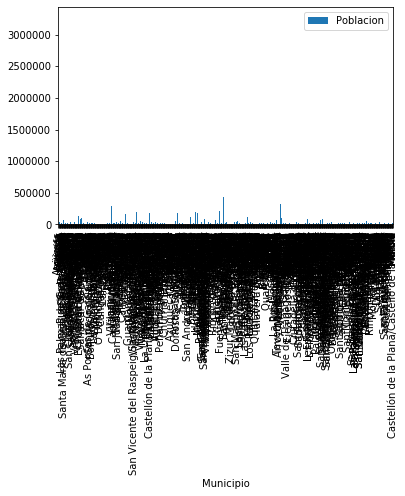

In [81]:
centroides.plot.bar(x = 'Municipio',y = 'Poblacion')

#### Hacer un gráfico equivalente pero para las diferentes provincias. Seleccionar un punto representativo de las ciudades incluidas en cada provincia.

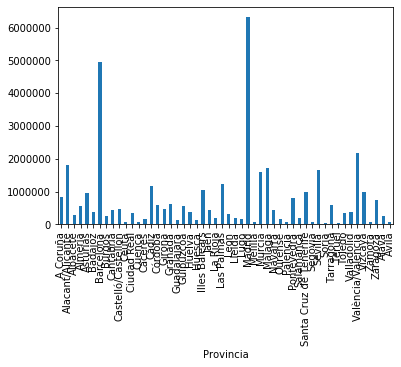

In [82]:
centroides.groupby('Provincia').sum()['Poblacion'].plot.bar()

### Series Temporales

#### Obtener y exporta en csv los datos asociados a las series mensuales, estacionales y anuales

#### Dibujar la serie temporal asociada al promedio espacial de los datos mensuales, estacionales y anuales.

#### Dibujar la distribución espacial de las estaciones, así como los valores promedio y máximo.

#### Calcular la frecuencia de días con precipitaciones mayores (>) de 1 mm.